In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Activation,MaxPooling2D,Conv2D,Dropout,BatchNormalization,Input,LeakyReLU
from keras.models import Model
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import cv2
import matplotlib.pyplot as plt
import os



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path="/content/drive/MyDrive/jupyterNotebook/Asang_splited_data"
import os


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Asang_splited_data_zip.zip" -d "/content/Asang_splited_data/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C217ThinF_IMG_20151106_142147_cell_208.png  
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C217ThinF_IMG_20151106_142147_cell_218.png  
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C217ThinF_IMG_20151106_142147_cell_249.png  
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C217ThinF_IMG_20151106_142147_cell_29.png  
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C217ThinF_IMG_20151106_142147_cell_60.png  
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C217ThinF_IMG_20151106_142147_cell_68.png  
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C217ThinF_IMG_20151106_142147_cell_83.png  
  inflating: /content/Asang_splited_data/Asang_splited_data/train/Uninfected/C218ThinF_IMG_20151106

In [ ]:
from tensorflow.keras.layers import Layer


In [ ]:
class DWTLayer(Layer):
    def call(self, x):

        shape = x.shape
        batch_size, h, w, c = shape[0], shape[1], shape[2], shape[3]


        h_even, w_even = h - (h % 2), w - (w % 2)
        x = x[:, :h_even, :w_even, :]


        x01 = x[:, 0::2, :, :]
        x02 = x[:, 1::2, :, :]

        x1 = x01[:, :, 0::2, :]
        x2 = x02[:, :, 0::2, :]
        x3 = x01[:, :, 1::2, :]
        x4 = x02[:, :, 1::2, :]

        x_LL = (x1 + x2 + x3 + x4)
        x_HL = (-x1 - x2 + x3 + x4)
        x_LH = (-x1 + x2 - x3 + x4)
        x_HH = (x1 - x2 - x3 + x4)
        ct=tf.concat([x_LL, x_HL, x_LH, x_HH], axis=-1)


        return ct

    def compute_output_shape(self, input_shape):
        batch, h, w, c = input_shape

        return (batch, h // 2, w // 2, c * 4)

In [ ]:
width=50
height = 50
input_layer = Input(shape=(height, width, 3))

x = Conv2D(32, (3,3), padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU(negative_slope=0.1)(x)

x = Conv2D(32, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(negative_slope=0.1)(x)


x = DWTLayer()(x)

x = Conv2D(64, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(negative_slope=0.1)(x)

x = Conv2D(64, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(negative_slope=0.1)(x)

x = DWTLayer()(x)

x=Conv2D(128,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU(alpha=0.1)(x)


x=Conv2D(128,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU(alpha=0.1)(x)

x=Conv2D(128,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU(alpha=0.1)(x)



x = Flatten()(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.5)(x)


x = Dense(512)(x)
x = BatchNormalization()(x)
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.5)(x)

x = Dense(2)(x)
x = BatchNormalization()(x)
output = Activation('softmax')(x)


model = Model(input_layer, output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50, 50, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 50, 50, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dwt_layer (DWTLayer)                 │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dwt_layer_1 (DWTLayer)               │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,5

 Total params: 20,186,154 (77.00 MB)

 Trainable params: 20,181,670 (76.99 MB)

 Non-trainable params: 4,484 (17.52 KB)

In [ ]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,  #EarlyStopping functions normally, stopping only when there’s no improvement for patience epochs.
    restore_best_weights=True
)
train_path="/content/Asang_splited_data/Asang_splited_data/test"
test_path="/content/Asang_splited_data/Asang_splited_data/test"


import os


# Check if folders exist and contain images
for category in ["Parasitized", "Uninfected"]:
    train_folder = os.path.join(train_path, category)
    test_folder = os.path.join(test_path, category)

    print(f"Train {category}: {len(os.listdir(train_folder))} images")
    print(f"Test {category}: {len(os.listdir(test_folder))} images")

import cv2


from tensorflow.keras.preprocessing.image import ImageDataGenerator
keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(50,50)
)
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    fill_mode='nearest',

    validation_split=0.1

)
test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_path,

    target_size=(50,50),
    batch_size=64,
    class_mode='categorical',
    subset='training'

)

validation_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(50,50),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(50,50),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Train Parasitized: 2756 images
Test Parasitized: 2756 images
Train Uninfected: 2756 images
Test Uninfected: 2756 images
Found 5512 files belonging to 2 classes.
Found 4962 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [ ]:
import os
train_path="/content/Asang_splited_data/Asang_splited_data/test"
test_path="/content/Asang_splited_data/Asang_splited_data/test"
# Check if folders exist and contain images
for category in ["Parasitized", "Uninfected"]:
    train_folder = os.path.join(train_path, category)
    test_folder = os.path.join(test_path, category)

    print(f"Train {category}: {len(os.listdir(train_folder))} images")
    print(f"Test {category}: {len(os.listdir(test_folder))} images")



Train Parasitized: 2756 images
Test Parasitized: 2756 images
Train Uninfected: 2756 images
Test Uninfected: 2756 images


In [ ]:
from tensorflow.keras.callbacks import Callback

class TestAccuracyCallback(Callback):
    def __init__(self, test_generator):
        super().__init__()
        self.test_generator = test_generator

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(self.test_generator, verbose=1)
        print(f"Epoch {epoch+1}: Test accuracy={test_accuracy:.4f} | Test loss={test_loss:.4f}")

test_callback = TestAccuracyCallback(test_generator)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
drive.mount('/content/drive')

checkpoint_path="/content/drive/MyDrive/Malaria_I P Without_DWT_Epoch(50)_lr(0.001)_Variation(32,64,128)Weights/Malaria_DWT_Weights.weights.h5"

checkpoint_callback=ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',

)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    steps_per_epoch=19260 // train_generator.batch_size,
    validation_steps=2806 // validation_generator.batch_size,

    callbacks=[checkpoint_callback,callback,test_callback],
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 78/300 ━━━━━━━━━━━━━━━━━━━━ 55s 250ms/step - accuracy: 0.6420 - loss: 0.6854

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.1749 - loss: 4.8626
Epoch 1: Test accuracy=0.5053 | Test loss=2.9086
300/300 ━━━━━━━━━━━━━━━━━━━━ 68s 149ms/step - accuracy: 0.6547 - loss: 0.6526 - val_accuracy: 0.5164 - val_loss: 2.3487
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.7870 - loss: 0.5156
Epoch 2: Test accuracy=0.4895 | Test loss=1.0043
300/300 ━━━━━━━━━━━━━━━━━━━━ 47s 82ms/step - accuracy: 0.8343 - loss: 0.4012 - val_accuracy: 0.4345 - val_loss: 1.0432
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.1869 - loss: 1.3482
Epoch 3: Test accuracy=0.5145 | Test loss=0.8805
300/300 ━━━━━━━━━━━━━━━━━━━━ 38s 71ms/step - accuracy: 0.9269 - loss: 0.2559 - val_accuracy: 0.5091 - val_loss: 0.9476
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5857 - loss: 0.9098
Epoch 4: Test accuracy=0.7534 | Test loss=0.5635
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 0.9380 - loss: 0.2294 - val_accuracy: 0.7091 - val_loss: 0.66

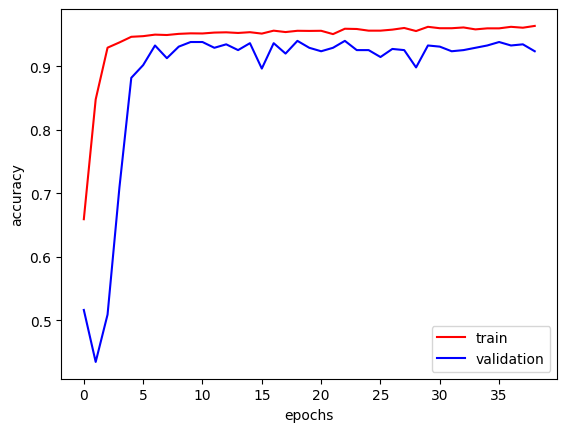

In [ ]:
acc_grap_path="/content/drive/MyDrive/Malaria_I P Without_DWT_Epoch(50)_lr(0.001)_Variation(32,64,128)Weights/acc_graph.png"
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(acc_grap_path,dpi=300,bbox_inches='tight')
plt.show()


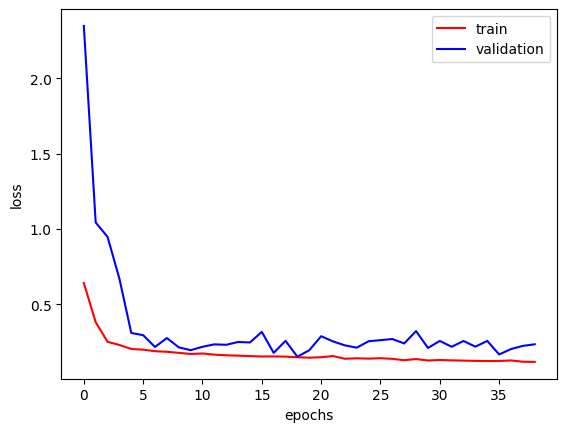

In [ ]:
loss_grap_path="/content/drive/MyDrive/Malaria_I P Without_DWT_Epoch(50)_lr(0.001)_Variation(32,64,128)Weights/loss_graph.png"
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig(loss_grap_path,dpi=300,bbox_inches='tight')
plt.show()



Training class indices: {'Parasitized': 0, 'Uninfected': 1}
Test class indices: {'Parasitized': 0, 'Uninfected': 1}
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step
Prediction shape: (5512,)
Sample of predictions: [0 0 0 0 0]
Sample of true labels: [0 0 0 0 0]


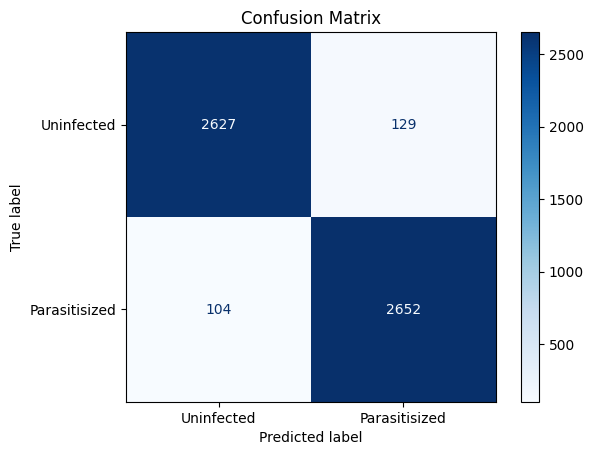

In [ ]:
# Print the class indices from both generators
print("Training class indices:", train_generator.class_indices)
print("Test class indices:", test_generator.class_indices)



y_pred=model.predict(test_generator)

y_pred=np.argmax(y_pred,axis=1)
y_true = test_generator.classes


print("Prediction shape:", y_pred.shape)
print("Sample of predictions:", y_pred[:5])
print("Sample of true labels:", y_true[:5])

from sklearn.metrics import confusion_matrix,f1_score, matthews_corrcoef, classification_report, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
cm

cm_path="/content/drive/MyDrive/Malaria_I P Without_DWT_Epoch(50)_lr(0.001)_Variation(32,64,128)Weights/confusion_metrix.png"

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Uninfected', 'Parasitisized'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig(cm_path,dpi=300,bbox_inches='tight')
plt.show()








In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
mcc = matthews_corrcoef(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"f1 score {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print(cm)

Accuracy: 0.9577
Precision: 0.9578
Recall: 0.9577
f1 score 0.9577
Matthews Correlation Coefficient (MCC): 0.9155
[[2627  129]
 [ 104 2652]]


In [ ]:

model.load_weights(checkpoint_path)


for layer in model.layers:
    print(f"layer {layer.name} weights ")
    print(layer.get_weights())



layer input_layer weights 
[]
layer conv2d weights 
[array([[[[-0.02590911,  0.01686649, -0.09436151, -0.06236058,
          -0.03449306, -0.08435362, -0.08122656,  0.10019203,
           0.01054789, -0.00841425,  0.09378906,  0.10033672,
          -0.00502463,  0.10882544, -0.04037061,  0.11286687,
          -0.03435177, -0.11752332,  0.06392922,  0.13087396,
           0.07989258, -0.12295964,  0.06049072,  0.13483135,
          -0.02174992,  0.03201418, -0.06939065,  0.00703448,
          -0.04060733, -0.10207796, -0.05392782,  0.01495027],
         [-0.06713608,  0.13511992, -0.12429971,  0.07094681,
          -0.15441667, -0.00660791,  0.03013021, -0.04406971,
           0.13577932,  0.07267734,  0.0113851 , -0.10257338,
           0.01290196,  0.0200139 ,  0.12586193, -0.01787768,
           0.07475074, -0.00355537, -0.11615065, -0.13587442,
          -0.07649211,  0.1014443 , -0.09242964, -0.11083397,
           0.14356282,  0.09239441,  0.03315945,  0.07321768,
           0.046